In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress

# spatial variation in $H$

In [2]:
data = pd.read_excel('data.xlsx', sheet_name='contour')
left2right = np.array(data['lr'])
down2top = np.array(data['dt'])

0.5 A

<Figure size 500x500 with 0 Axes>

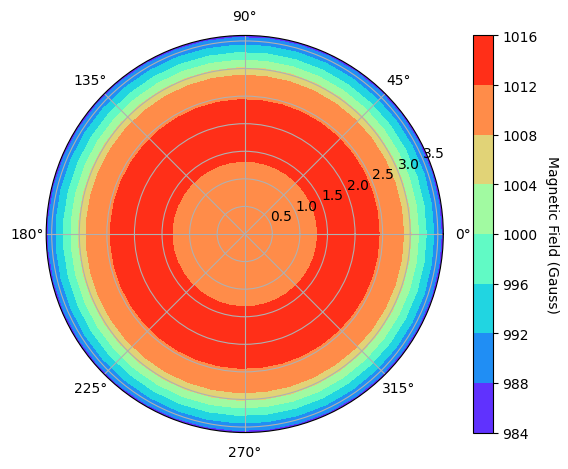

In [10]:
lr1 = ((left2right[:6]+left2right[6:12][::-1])/2)[::-1]
b2 = np.repeat(lr1[np.newaxis,:], 40, axis=0)
azimuths = np.radians(np.linspace(0, 360, 40))
zeniths = np.linspace(0, 3.6, 6)

plt.figure(figsize=(5,5))
r, theta = np.meshgrid(zeniths, azimuths)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
cont = ax.contourf(theta, r, b2, cmap='rainbow')
cbar = plt.colorbar(cont)
cbar.set_label('Magnetic Field (Gauss)', rotation=270, labelpad=15)
plt.tight_layout()
plt.savefig('images/contour0.5.eps')
# plt.show()


1 A

<Figure size 500x500 with 0 Axes>

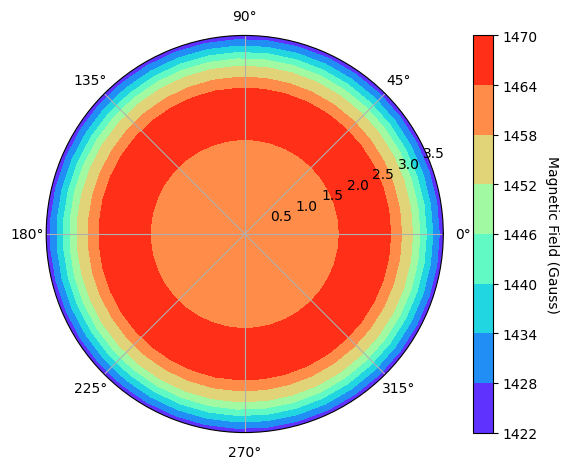

In [11]:
b3 = np.array(data['B1'])[1:9][::-1]
b3 = np.repeat(b3[np.newaxis,:], 40, axis=0)
azimuths = np.radians(np.linspace(0, 360, 40))
zeniths = np.linspace(0, 3.6, 8)
plt.figure(figsize=(5,5))
r, theta = np.meshgrid(zeniths, azimuths)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
cont = ax.contourf(theta, r, b3, cmap='rainbow')
cbar = plt.colorbar(cont)
cbar.set_label('Magnetic Field (Gauss)', rotation=270, labelpad=15)
plt.tight_layout()
plt.savefig('images/contour1.eps')
ax.yaxis.grid(False)

# magnetoresistance

In [3]:
def exponential(x, A, B, C, D): return A*np.exp(B*(x-C)) + D
def fit_exponential(xs, ys, p0=(1,1,1,1), params=False):
        
    popt, pcov = curve_fit(f=exponential, xdata=xs, ydata=ys)
    xFit = np.arange(min(xs)-0.1,max(xs)+0.1, 2e-4)
    A, m, c, d = popt
    if params:
        A,m,c,d = params
    return xFit, exponential(xFit, A, m, c, d), (A, m, c, d), (np.diag(pcov)**0.5)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


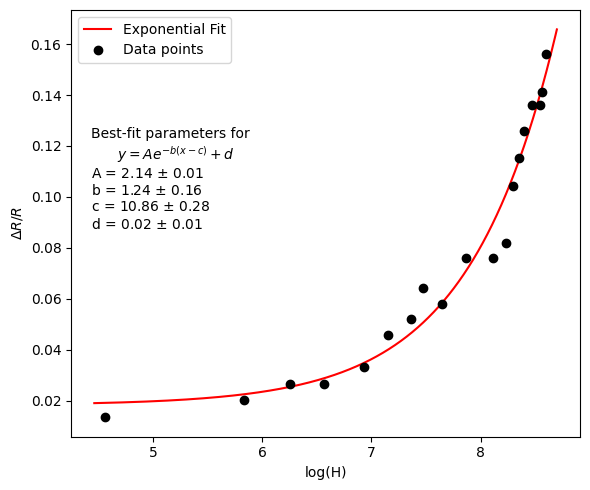

In [4]:
data1 = pd.read_excel('data.xlsx', sheet_name='rm_198')
logh = data1['logH'][:19]
rbyr = data1['rbyr'][:19]
fits = fit_exponential(logh, rbyr, params=(2.144e+00, 1.238e+00,1.086e+01,1.830e-02))
plt.figure(figsize=(6,5))
plt.plot(fits[0], fits[1], '-r', label='Exponential Fit')
plt.plot(logh, rbyr, 'ko', label='Data points')
label = f'Best-fit parameters for\n      '+  r'$y=A e^{-b(x-c)} + d$' + f'\nA = {fits[2][0]:.2f}' + r' $\pm$ ' + f'{0.01:.2f}\n' \
        + r'b' + f' = {fits[2][1]:.2f}' + r' $\pm$ ' + f'{0.16:.2f}\n' \
        + r'c' + f' = {fits[2][2]:.2f}' + r' $\pm$ ' + f'{0.28:.2f}\n' \
        + r'd' + f' = {fits[2][3]:.2f}' + r' $\pm$ ' + f'{0.01:.2f}\n'
plt.text(0.16,0.5,label, fontsize=10,transform=plt.gcf().transFigure)
plt.legend()
plt.xlabel('log(H)')
plt.ylabel(r'$\Delta R/R$')
plt.tight_layout();plt.savefig('images/198rm.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


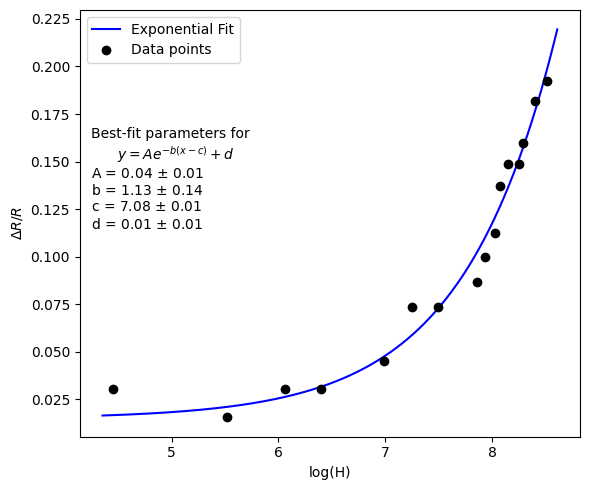

In [7]:
data1 = pd.read_excel('data.xlsx', sheet_name='rm_99')
logh = data1['logH'][:19]
rbyr = data1['rbyr'][:19]
fits = fit_exponential(logh, rbyr, params=(3.635e-02, 1.132e+00,7.083e+00,1.492e-02))
plt.figure(figsize=(6,5))
plt.plot(fits[0], fits[1], '-b', label='Exponential Fit')
plt.plot(logh, rbyr, 'ko', label='Data points')
label = f'Best-fit parameters for\n      '+  r'$y=A e^{-b(x-c)} + d$' + f'\nA = {fits[2][0]:.2f}' + r' $\pm$ ' + f'{0.01:.2f}\n' \
        + r'b' + f' = {fits[2][1]:.2f}' + r' $\pm$ ' + f'{0.14:.2f}\n' \
        + r'c' + f' = {fits[2][2]:.2f}' + r' $\pm$ ' + f'{0.01:.2f}\n' \
        + r'd' + f' = {fits[2][3]:.2f}' + r' $\pm$ ' + f'{0.01:.2f}\n'
plt.text(0.16,0.5,label, fontsize=10,transform=plt.gcf().transFigure)
plt.legend()
plt.xlabel('log(H)')
plt.ylabel(r'$\Delta R/R$')
plt.tight_layout();plt.savefig('images/99rm.eps')

# hall effect

In [4]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-4)
    label = f'For the best fit line (r-value = {popt.rvalue:.3f}):\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 

    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

(2344.457219688116, 396.1431811613338)

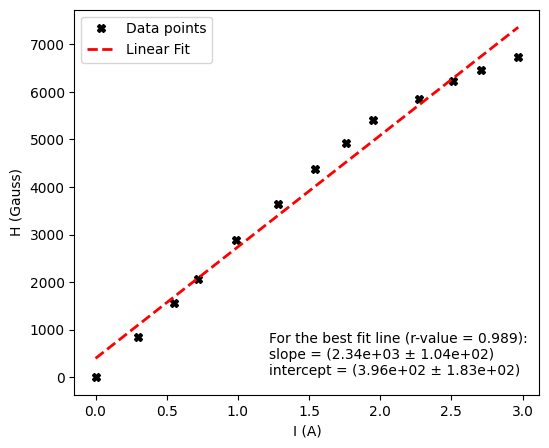

In [5]:
data = pd.read_excel('data.xlsx', sheet_name='calibration')
xx, yy, fit, error, label = fit_line(data['i'], data['b']*10)
plt.figure(figsize=(6,5))
plt.plot(data['i'], data['b']*10, 'kX', label='Data points')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.ylabel('H (Gauss)')
plt.xlabel('I (A)')
plt.text(0.45,0.15,label, fontsize=10,transform=plt.gcf().transFigure)
B, C = fit
calibratedB = lambda i: (B*i) + C
# plt.tight_layout();plt.savefig('images/cal.eps')
B,C

Hall coefficient: -564.64704920 \pm 19.19341268 mm^3/C
Charge carrier density: 1.107e+16 \pm 3.763e+14 mm^-3
Charge carrier mobility: -7.340e-02 \pm 2.495e-03 mm^2/Vs


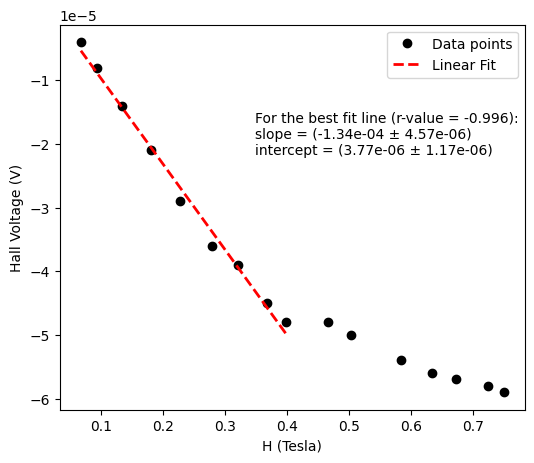

In [7]:
data1 = pd.read_excel('data.xlsx', sheet_name='rh1')
b1 = calibratedB(data1['coil_current'])*1e-4 # tesla
t1 = 0.5*1e-3 # mm
i1 = 119*1e-3 # mA
xx, yy, fit1, error1, label1 = fit_line(b1[:9], data1['hall_voltage'][:9]*1e-3)
plt.figure(figsize=(6,5))
plt.plot(b1, data1['hall_voltage']*1e-3, 'ko', label='Data points')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.xlabel('H (Tesla)')
plt.ylabel('Hall Voltage (V)')
plt.text(0.45,0.62,label1, fontsize=10,transform=plt.gcf().transFigure)
hc1 = fit1[0]*t1/i1*1e9
hc1_err = hc1*error1[0]/fit1[0]
print(f'Hall coefficient: {hc1:.8f} \pm {hc1_err:.8f} mm^3/C')
print(f'Charge carrier density: {-1/(1.6e-19*hc1):.3e} \pm {(1/(1.6e-19*hc1))*(hc1_err/hc1):.3e} mm^-3')
print(f'Charge carrier mobility: {(1.3e-4*hc1):.3e} \pm {1.3e-4*hc1_err:.3e} mm^2/Vs')
# plt.tight_layout();plt.savefig('images/119rh.eps')

Hall coefficient: -506.95444045 \pm 15.27027220 mm^3/C
Charge carrier density: 1.233e+16 \pm 3.714e+14 mm^-3
Charge carrier density: -6.590e-02 \pm 1.985e-03 mm^2/Vs


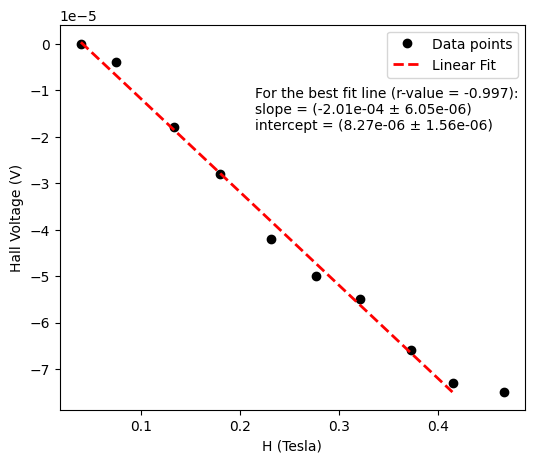

In [8]:
data1 = pd.read_excel('data.xlsx', sheet_name='rh2')
b1 = calibratedB(data1['coil_current'])*1e-4 # tesla
t1 = 0.5*1e-3 # mm
i1 = 198*1e-3 # mA
xx, yy, fit1, error1, label1 = fit_line(b1[:9], data1['hall_voltage'][:9]*1e-3)
plt.figure(figsize=(6,5))
plt.plot(b1, data1['hall_voltage']*1e-3, 'ko', label='Data points')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.xlabel('H (Tesla)')
plt.ylabel('Hall Voltage (V)')
plt.text(0.45,0.67,label1, fontsize=10,transform=plt.gcf().transFigure)
hc1 = fit1[0]*t1/i1*1e9
hc1_err = hc1*error1[0]/fit1[0]
print(f'Hall coefficient: {hc1:.8f} \pm {hc1_err:.8f} mm^3/C')
print(f'Charge carrier density: {-1/(1.6e-19*hc1):.3e} \pm {(1/(1.6e-19*hc1))*(hc1_err/hc1):.3e} mm^-3')
print(f'Charge carrier density: {(1.3e-4*hc1):.3e} \pm {1.3e-4*hc1_err:.3e} mm^2/Vs')
# plt.tight_layout();plt.savefig('images/198rh.eps')